In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error,
                            mean_absolute_percentage_error)
from sklearn.feature_selection import RFE

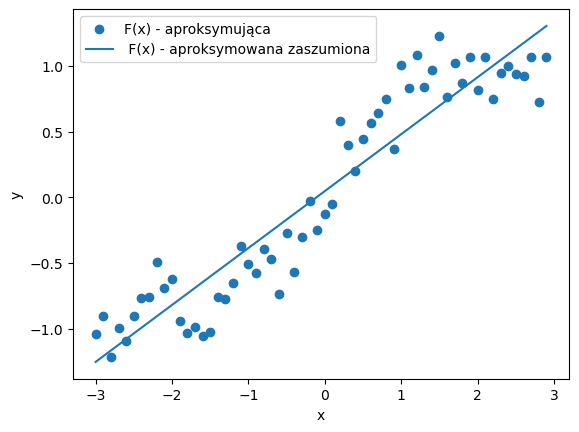

In [2]:
x = np.arange(-3, 3, 0.1).reshape((-1, 1))
y = np.tanh(x) + np.random.randn(*x.shape)*0.2
ypred = LinearRegression().fit(x, y).predict(x)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, ypred)
plt.legend([ 'F(x) - aproksymująca',
             ' F(x) - aproksymowana zaszumiona'])

In [3]:
bh_data = pd.read_excel('practice_lab_2.xlsx')
bh_cechy = bh_data.columns.to_list()
bh_arr = bh_data.values
X, y = bh_arr[:, :-1], bh_arr[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 221, shuffle = False)

Text(0, 0.5, 'y_pred')

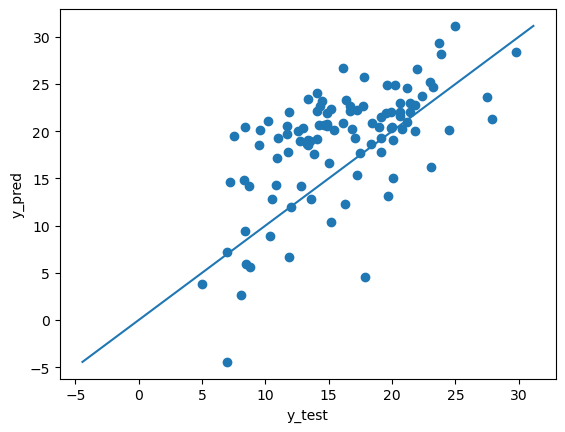

In [4]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)
minval = min(y_test.min(), y_pred.min())
maxval = max(y_test.max(), y_pred.max())
plt.scatter(y_test, y_pred)
plt.plot([minval, maxval], [minval, maxval])
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 221, shuffle = True)
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
#print(mse)
#print(mae)
#print(mape)

Text(0.5, 1.0, 'Medianowa wartosc mieszkania')

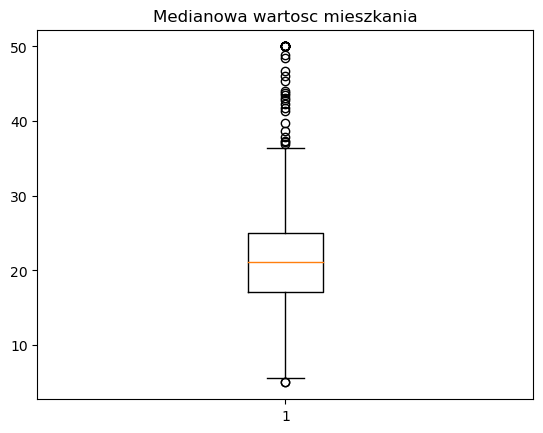

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    shuffle = True)
plt.boxplot(y_train)
plt.title("Medianowa wartosc mieszkania")

In [7]:
outliers = np.abs((y_train - y_train.mean()) / y_train.std()) > 3
X_train_no_outliers = X_train[~outliers, :]
y_train_no_outliers = y_train[~outliers]
y_train_mean = y_train.copy()
y_train_mean[outliers] = y_train.mean()

[Text(0, 0, 'Przestepczosc'),
 Text(1, 0, 'Mieszkaniowa'),
 Text(2, 0, 'Niemieszkaniowa'),
 Text(3, 0, 'PrzyRzece'),
 Text(4, 0, 'TlenkiAzotu'),
 Text(5, 0, 'LPokojow'),
 Text(6, 0, 'WiekMieszkan'),
 Text(7, 0, 'OdleglOdCentrow'),
 Text(8, 0, 'DostDoMetra'),
 Text(9, 0, 'Podatki'),
 Text(10, 0, 'NauczUczen'),
 Text(11, 0, 'AfrAmer'),
 Text(12, 0, 'PracFiz')]

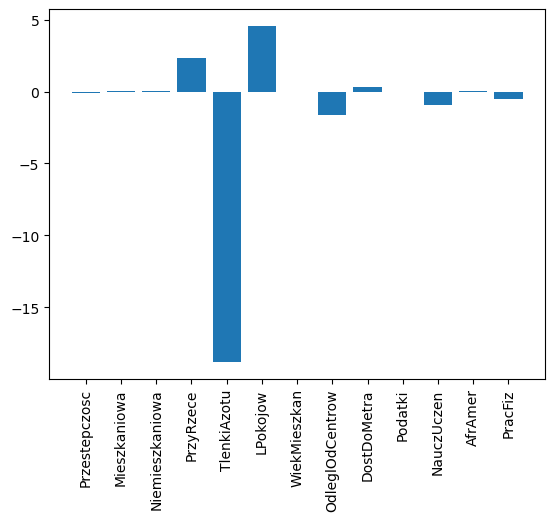

In [8]:
linReg = LinearRegression()
linReg.fit(X_train, y_train_mean)
bh_cechy = bh_data.columns.to_list()
niezalezne_cechy = bh_cechy[:-1]
fig, ax = plt.subplots(1, 1)
x = np.arange(len(niezalezne_cechy))
wagi = linReg.coef_
ax.bar(x, wagi)
ax.set_xticks(x)
ax.set_xticklabels(niezalezne_cechy,  rotation = 90)

In [9]:
bh_data.corr()

,Przestepczosc,Mieszkaniowa,Niemieszkaniowa,PrzyRzece,TlenkiAzotu,LPokojow,WiekMieszkan,OdleglOdCentrow,DostDoMetra,Podatki,NauczUczen,AfrAmer,PracFiz,MedianowaCena
Przestepczosc,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Mieszkaniowa,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Niemieszkaniowa,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
PrzyRzece,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
TlenkiAzotu,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
LPokojow,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
WiekMieszkan,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
OdleglOdCentrow,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
DostDoMetra,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Podatki,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
# zadanie 2.2
def zadanie2_2(powtorzenia):
    wyniki = []
    for x in range (powtorzenia):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
        linReg = LinearRegression()
        linReg.fit(X_train, y_train)
        y_pred = linReg.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        wyniki.append(mape)
    najlepszy_wynik = min(wyniki)
    indeks_najlepszego_wyniku = wyniki.index(najlepszy_wynik)
    print("Najlepszy otrzymany wynik: ", najlepszy_wynik, " przebieg nr: ", indeks_najlepszego_wyniku + 1)
#    return wyniki
zadanie2_2(10000)

Najlepszy otrzymany wynik:  0.1136731809446168  przebieg nr:  4601


In [11]:
# zadanie 2.3
def zadanie2_3(powtorzenia):
    wyniki = []
    for x in range (powtorzenia):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
        outliers2 = np.abs((y_train - y_train.mean()) / y_train.std()) > 3
        X_train_no_outliers2 = X_train[~outliers2,:]
        y_train_no_outliers2 = y_train[~outliers2]
        y_train_mean = y_train.copy()
        y_train_mean[outliers2] = y_train.mean()
        linReg = LinearRegression()
        linReg.fit(X_train_no_outliers2, y_train_no_outliers2)
        y_pred = linReg.predict(X_test)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        wyniki.append(mape)
    najlepszy_wynik = min(wyniki)
    indeks_najlepszego_wyniku = wyniki.index(najlepszy_wynik)
    print("Najlepszy otrzymany wynik: ", najlepszy_wynik, " przebieg nr: ", indeks_najlepszego_wyniku + 1)
#    return wyniki
zadanie2_3(10000)

Najlepszy otrzymany wynik:  0.11120144816854512  przebieg nr:  2319


In [15]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [16]:
data = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [18]:
res = pd.Series(diabetes.target)
res.name = "postepChoroby"
res

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: postepChoroby, Length: 442, dtype: float64

In [22]:
data_cechy = data.columns.to_list()
data_arr = data.values
X, y = data_arr[:, :], res
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

Text(0, 0.5, 'y_pred')

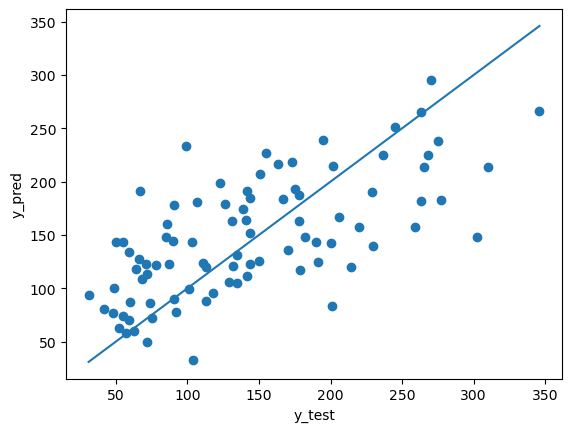

In [28]:
linReg = LinearRegression()
linReg.fit(X_train, y_train)
y_pred = linReg.predict(X_test)
minval = min(y_test.min(), y_pred.min())
maxval = max(y_test.max(), y_pred.max())
plt.scatter(y_test, y_pred)
plt.plot([minval, maxval], [minval, maxval])
plt.xlabel('y_test')
plt.ylabel('y_pred')